# Parameters tuning
Find the optimal parameter for each algorithm


In [1]:
#%load_ext autoreload
#%autoreload 2

from evaluator import evaluate
from bandits import LinUCB, Ucb1, Egreedy
from matplotlib import pyplot as plt
import numpy as np

In [2]:
%%time
import dataset
files = ("dataset/R6/ydata-fp-td-clicks-v1_0.20090502",'dataset/R6/ydata-fp-td-clicks-v1_0.20090503')
dataset.get_yahoo_events(files)

7646058 events with 62 articles
CPU times: user 3min 45s, sys: 5.06 s, total: 3min 51s
Wall time: 3min 51s


In [3]:
_, deploy_ctr = evaluate(Egreedy(1))
rnd_ctr = deploy_ctr[-1]

Egreedy (ε=1)       0.0294    21.4s


In [4]:
def plot_results(tests):
    
    learn_ctrs = []
    deploy_ctrs = []

    for test in tests:
        learn, deploy = evaluate(test)
        learn = learn[1000:]
        if hasattr(test, 'e'):
            plt.plot(learn, label="ε={}".format(test.e))
        else:
            plt.plot(learn, label="α={}".format(test.alpha))
        
        learn_ctrs.append(learn[-1]/rnd_ctr)   
        deploy_ctrs.append(deploy[-1]/rnd_ctr) 

    plt.title("Learning bucket")
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    
    if hasattr(test, 'e'):
        param_values = [x.e for x in tests]
        plt.xlabel("ε")
    else:
        param_values = [x.alpha for x in tests]
        plt.xlabel("α")
    plt.plot(param_values, learn_ctrs,marker='o')
    plt.title('Learning bucket')
    plt.ylabel("CTR lift")
    plt.show()


    if hasattr(test, 'e'):
        plt.xlabel("ε")
    else:
        plt.xlabel("α")
    plt.ylabel("CTR lift")
    plt.plot(param_values, deploy_ctrs,marker='o')
    plt.title('Deployment bucket')
    plt.show()

    best_idx = np.argmax(deploy_ctrs)
    print('Best parameter:',tests[best_idx].algorithm)

## Results for E-greedy

Egreedy (ε=0.1)     0.0445    36.6s
Egreedy (ε=0.2)     0.041     35.6s
Egreedy (ε=0.3)     0.0405    34.6s
Egreedy (ε=0.4)     0.0393    33.1s
Egreedy (ε=0.5)     0.0384    32.1s
Egreedy (ε=0.6)     0.0358    30.5s
Egreedy (ε=0.7)     0.0343    28.9s
Egreedy (ε=0.8)     0.0336    27.1s
Egreedy (ε=0.9)     0.0307    24.7s


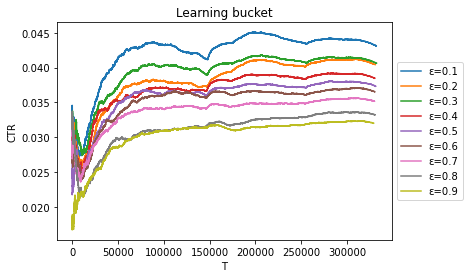

Best parameter: Egreedy (ε=0.1)
CPU times: user 4min 43s, sys: 2.12 s, total: 4min 45s
Wall time: 4min 44s


In [5]:
%%time
epsilon_values = np.arange(0.1,1,0.1)
tests = [Egreedy(e) for e in epsilon_values]
plot_results(tests)

## Results for UCB 

UCB1 (α=0.1)        0.0452    1.4m
UCB1 (α=0.3)        0.0436    1.3m
UCB1 (α=0.5)        0.0411    1.3m
UCB1 (α=0.7)        0.0393    1.3m
UCB1 (α=0.9)        0.0379    1.4m
UCB1 (α=1.1)        0.0386    1.4m
UCB1 (α=1.3)        0.0366    1.3m


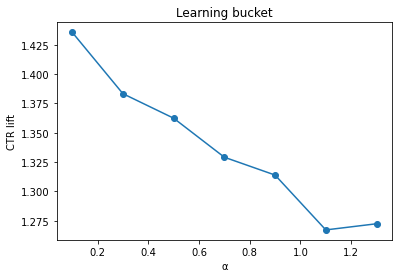

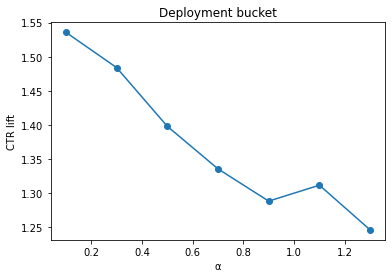

Best parameter: UCB1 (α=0.1)
CPU times: user 9min 22s, sys: 3.25 s, total: 9min 25s
Wall time: 9min 25s


In [6]:
%%time
alpha_values = np.arange(0.1,1.4,0.2)
tests = [Ucb1(a) for a in alpha_values]
plot_results(tests)

## Results for LinUCB

LinUCB (α=0.1)      0.0485    13.8m
LinUCB (α=0.3)      0.0504    13.9m
LinUCB (α=0.5)      0.05      13.9m
LinUCB (α=0.7)      0.0469    13.7m
LinUCB (α=0.9)      0.0472    14.0m
LinUCB (α=1.1)      0.0473    13.8m
LinUCB (α=1.3)      0.047     13.7m


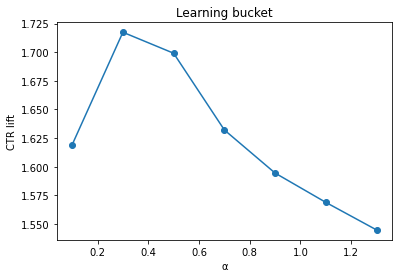

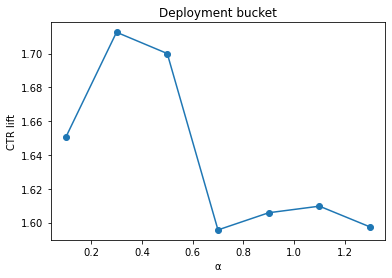

Best parameter: LinUCB (α=0.3)
CPU times: user 1h 36min 47s, sys: 1.78 s, total: 1h 36min 49s
Wall time: 1h 36min 50s


In [7]:
%%time
alpha_values = np.arange(0.1,1.4,0.2)
tests = [LinUCB(a) for a in alpha_values]
plot_results(tests)